<a href="https://colab.research.google.com/github/marcelorandolfo/data-science/blob/master/alura/Formacao_Data_Science_Alura_Analise_Exploratoria_do_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informações

Nome: Marcelo Randolfo da Costa Januário

Principais conclusões:

- Menos de 20% dos filmes possuem uma nota média superior a 4,0.
- Menos de 20% dos filme tem um número de votos maior que 120.
- Os gêneros de filmes mais comuns são: `Comedy`, `Drama`, `Action`, `Adventure` e `Thriller`.
- O gênero que possui a maior média de votos por filme é o gênero `War`.
- O total de votos para os filmes de gênero `Adventure` é estatisticamente superior ao total de votos para os filmes do gênero `Horror`. 
- Tanto um filme do gênero `Horror` quanto um filme do gênero `Adventure` possuem a mesma possibilidade de terem notas altas, dado que a média das notas desses filmes não são estatísticamente diferentes.
- O gênero `Action` é o gênero de filmes mais assistido, seguido do gênrero `Drama`. O filme mais assistido do primeiro gênero é Clube da luta, enquanto o mais assistido do segundo gênero é Um sonho de liberdade.
- A correlação entre o ano de lançamento do filme e sua nota média é negativa. Quanto mais novo o filme é, logo, maior é o seu ano de lançamento, mais ele tende a ter uma nota média menor do que os filmes lançados anteriormente.
- Não parece haver uma relação linear ente o total de votos e ano de lançamento do filme.
- Há uma relação positiva entre o total de votos e a nota média, ou seja, quanto maior a quantidade de votos, maior é a tendência do filme ter uma nota média maior.
- Filmes de animação possuem uma relação positiva entre o ano de lançamento e a nota média, ou seja, quanto mais novo o filme é, maior é a tendência de sua nota média ser alta. 
- Essa característica parece ser particular de filmes do gênero `Animation`, pois ao observar a relação entre o ano de lançamento com a nota média e com o total de votos para filmes dos gêneros `Action`, `Comedy` e `Romance`, a relação é a mesma para os filmes analisados conjuntamente.
- Dentre os piores filmes, ou seja, aqueles que possuem a menor nota média, é mais comum vermos filmes de comédia, seguidos por filmes de ação. 
-  Dentro os filmes considerados bons, temos que drama é o gênero mais comum, seguido do gênero crime.




---


# Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Science www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

<center><img src='https://hipsters.tech/wp-content/uploads/2017/08/alurja-v2.png' width='400px'></center>

## Dicas para o projeto completo

- Todo gráfico deve ter um título, labels e legendas que fazem sentido.
- Configure um tamanho adequado para os gráficos.
- Utilize as versões dos arquivos de dados disponíveis no Github.

## Conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente.
- Devemos usar seaborn 0.9.0 ou mais recente.
- Devemos usar scipy 1.2.0 ou mais recente.

In [0]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# verificando versões
print("Usando pandas:", pd.__version__)
print("Usando seaborn:", sns.__version__)
print("Usando scipy:", scipy.__version__)

Usando pandas: 0.25.3
Usando seaborn: 0.9.0
Usando scipy: 1.4.1


No caso, os pacotes pandas, seaborn e scipy estão em versões adequadas para o projeto.

## Importando os dados de filmes

- Os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`.
- Renomeie as colunas para `filmeId`, `titulo` e `generos`.
- Configure o indice (`index`) para ser o `filmeId`.

In [0]:
# file path
file_path = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv'

# criando um DataFrame
filmes = pd.read_csv(file_path)

# renomeando colunas
filmes.columns = ['filmeId', 'titulo','generos']

# setando index do DataFrame para filmeId
filmes.set_index('filmeId', inplace = True)

#visualizando cinco primeiras entradas
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [0]:
# obtendo o tamanho do DataFrame
if(filmes.shape[0] == 9742):
  print("O DataFrame é composto de {} filmes.".format(filmes.shape[0]))
else:  
  print("ERRO! O conjunto de dados que deveríamos utilizar possui 9742 filmes.")

O DataFrame é composto de 9742 filmes.


### Obtendo o ano de lançamento dos filmes

In [0]:
# extraindo o ano de lançamento do título
ano_de_lancamento = filmes['titulo'].str.extract('\((\d{4})')

# criando nova coluna para o ano de lançamento do filme
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)

# excluindo os anos do título do filme
filmes['titulo'] = filmes['titulo'].apply(lambda x: x.split(' (1')[0])
filmes['titulo'] = filmes['titulo'].apply(lambda x: x.split(' (2')[0])

#observando as cinco primeiras entradas
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji,Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men,Comedy|Romance,1995.0
4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II,Comedy,1995.0


## Importando os dados de notas

- Os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`.
- Renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`.

In [0]:
# file path
file_path = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv'

# criando um DataFrame
notas = pd.read_csv(file_path)

# renomeando colunas
notas.columns = ['usuarioId', 'filmeId', 'nota','momento']

#visualizando cinco primeiras entradas
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Obtendo a nota média dos filmes

- Crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`.

- Dicas:
  - como `filmeId` já é o indice do DataFrame filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice.


In [0]:
# agrupando notas por filmeId
notas_agrup = notas.groupby('filmeId')

# calculando nota média
nota_media = notas_agrup['nota'].mean()

# criando coluna notam_media no DataFrame filmes
filmes['nota_media'] = nota_media

# visualizando cinco primeiras entradas de filmes
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji,Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men,Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale,Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II,Comedy,1995.0,3.071429


### Removendo os filmes com menos de avaliações

- Conte o número de notas por filme.
- Adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados.
- Remova os que tem 49 ou menos de `filmes`.

In [0]:
# calculando quantidade de votos utilizando o notas_agrup
total_de_votos = notas_agrup['nota'].count()

# criando coluna notam_media no DataFrame filmes
filmes['total_de_votos'] = total_de_votos

# tamanho do DataFrame antes da exclusão de filmes com menos de 50 avaliações
print('Quantidade de filmes no DataFrame antes da exclusão de filmes com menos de 50 avaliações: {}'.format(filmes.shape[0]))

# excluindo filmes com menos de 50 avaliações
filmes = filmes[filmes['total_de_votos'] >= 50]

# tamanho do DataFrame após exclusão de filmes com menos de 50 avaliações
print('Quantidade de filmes no DataFrame após exclusão de filmes com menos de 50 avaliações: {}'.format(filmes.shape[0]))

Quantidade de filmes no DataFrame antes da exclusão de filmes com menos de 50 avaliações: 9742
Quantidade de filmes no DataFrame após exclusão de filmes com menos de 50 avaliações: 450


In [0]:
print('Estatísticas da coluna total_de_votos:\n')
print(filmes['total_de_votos'].describe())

Estatísticas da coluna total_de_votos:

count    450.000000
mean      91.911111
std       46.098385
min       50.000000
25%       59.000000
50%       76.000000
75%      107.750000
max      329.000000
Name: total_de_votos, dtype: float64


## Visualizando os dados gerais

### Notas médias

Gráficos utilizados para visualização:

- Histograma.
- Histograma com *cummulative distribution function*.

Dicas:

- Lembre-se de colocar um título nas imagens além de nomes nos eixos x e y.
- Para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`.

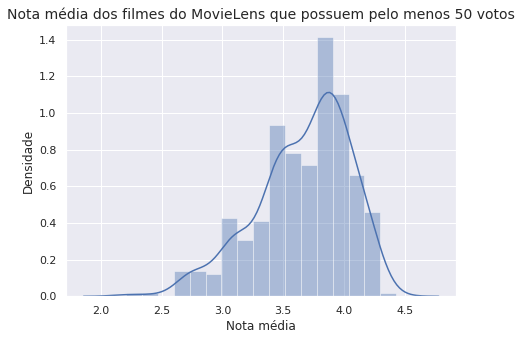

In [0]:
# setando estilo do seaborn
sns.set()

# histograma com distribuição
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['nota_media'], ax=ax)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média dos filmes do MovieLens que possuem pelo menos 50 votos', fontsize = 14)
plt.show();

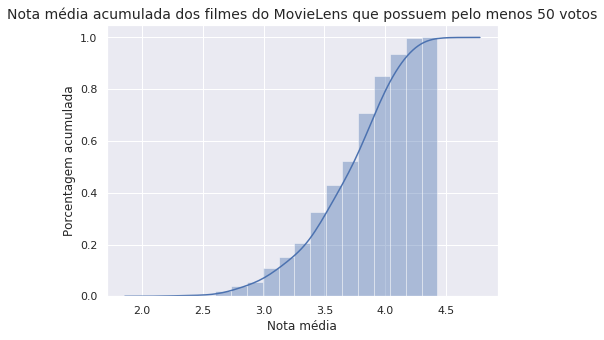

In [0]:
# histograma com distribuição cumulativa
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['nota_media'], ax=ax, 
             hist_kws = {'cumulative':True},
             kde_kws = {'cumulative':True})
ax.set(xlabel = 'Nota média', ylabel = 'Porcentagem acumulada')
ax.set_title('Nota média acumulada dos filmes do MovieLens que possuem pelo menos 50 votos', fontsize=14)
plt.show()

#### Pergunta: 20% dos filmes do DataFrame tem nota maior que? 

- Lembre-se da função `quantile` do pandas.

In [0]:
# calculando percentil 0.8
percentil_nota_08 = filmes['nota_media'].quantile(0.8)

print("20% dos filmes tem nota média maior que {:.2f}.".format(percentil_nota_08))

20% dos filmes tem nota média maior que 3.99.


### Total de votos

Gráficos utilizados para visualização:

- Histograma.
- Histograma com *cummulative distribution function*.

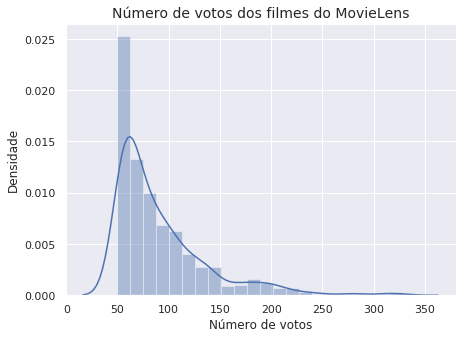

In [0]:
# histograma com distribuição
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['total_de_votos'], ax=ax)
ax.set(xlabel = 'Número de votos', ylabel = 'Densidade')
ax.set_title('Número de votos dos filmes do MovieLens', fontsize=14)
plt.show();

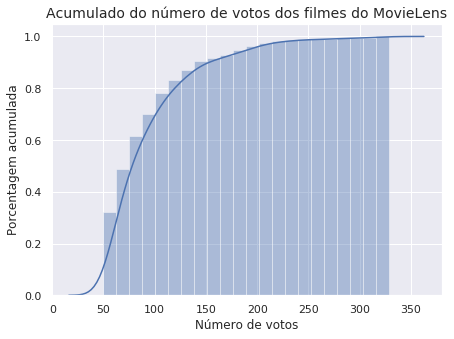

In [0]:
# histograma com distribuição cumulativa
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['total_de_votos'], ax=ax, 
             hist_kws = {'cumulative':True},
             kde_kws = {'cumulative':True})
ax.set(xlabel = 'Número de votos', ylabel = 'Porcentagem acumulada')
ax.set_title('Acumulado do número de votos dos filmes do MovieLens', fontsize=14)
plt.show()

#### Pergunta: 20% dos filmes do DataFrame tem número de votos maior que? 

- Lembre-se da função `quantile` do pandas.

In [0]:
# calculando percentil 0.8
percentil_votos_08 = filmes['total_de_votos'].quantile(0.8)

print("20% dos filmes tem um número total de votos maior que {:.2f}.".format(percentil_votos_08))

20% dos filmes tem um número total de votos maior que 119.20.


## Separando a coluna `generos` em diversas colunas.

- Utilizando a função `get_dummies`.

In [0]:
# excluindo caracter da string de gêneros
filmes['generos'] = filmes['generos'].str.replace('-', '')

# obtendo as colunas categóricas de gêneros
generos = filmes['generos'].str.get_dummies()

print("Temos {} gêneros distintos de filmes.".format(generos.shape[1]))

Temos 19 gêneros distintos de filmes.


In [0]:
# fazendo o join das colunas de gêneros no DataFrame filmes e excluindo a coluna original
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)

# observando as cinco primeiras entradas
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat,1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina,1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes.
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes.

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`.
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`.
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn.

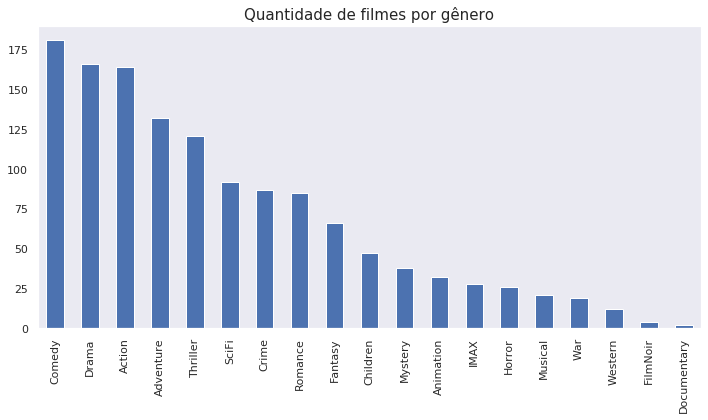

In [0]:
# gráfico de colunas
fig, ax = plt.subplots(figsize = (10,6))

generos.sum().sort_values(ascending=False).plot(ax = ax, kind = 'bar', grid=False)
ax.set_title('Quantidade de filmes por gênero', fontsize=15)

plt.tight_layout()

### Quais são os 5 gêneros com mais filmes?

Dica:

- Utilizando a função `sort_values()` pode ordenar uma `Series` do pandas.

In [0]:
# obtendo o top 5 de gêneros com mais filmes
top5 = generos.sum().sort_values(ascending=False)[0:5]

print('Os 5 gêneros com mais filmes são:\n')
print('Gênero\t Quantidade de filmes\n \n{}'.format(top5))

Os 5 gêneros com mais filmes são:

Gênero	 Quantidade de filmes
 
Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Visualização de votos por gênero

- O código que gera os votos por gênero já está pronto.
- Ordene as categorias da mais visualizada para a menos visualizada.
- Gere a visualização por gênero.

In [0]:
# obtendo os votos por gêneros (multiplicando o total de votos pelas colunas categóricas de gêneros)
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)

# observando as cinco primeiras entradas
votos_por_genero_por_filme.head()


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


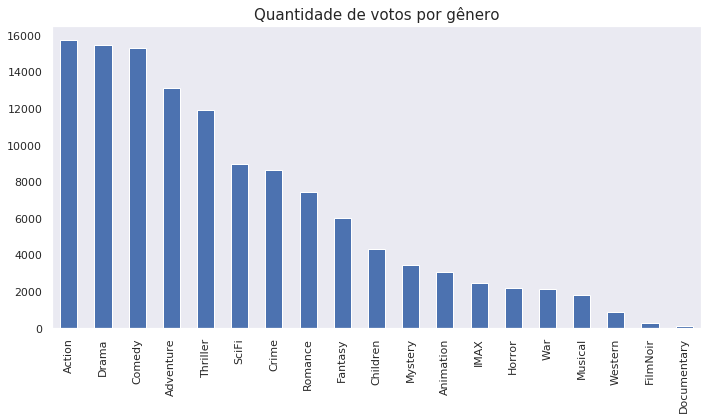

In [0]:
# obtendo a visualização com o gráfico de colunas
fig, ax = plt.subplots(figsize = (10,6))

votos_por_genero_por_filme.sum().sort_values(ascending=False).plot(ax = ax, kind = 'bar', grid=False)
ax.set_title('Quantidade de votos por gênero', fontsize=15)

plt.tight_layout()

## Visualização de votos por filme por gênero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele gênero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a \"popularidade\" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero.
- Calcule o número de votos por genero dividido pelo total de filmes por genero.
- Ordene do maior para o menor.
- Plote um gráfico para visualizarmos esses dados.

In [0]:
# obtendo os votos por filme por gênero
votos_por_filme_por_genero = (votos_por_genero_por_filme.sum() / generos.sum())

print('Proporção do número de votos dividido pelo número de filmes de cada gênero:\n \n{}'.format(votos_por_filme_por_genero.sort_values(ascending = False)))

Proporção do número de votos dividido pelo número de filmes de cada gênero:
 
War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64


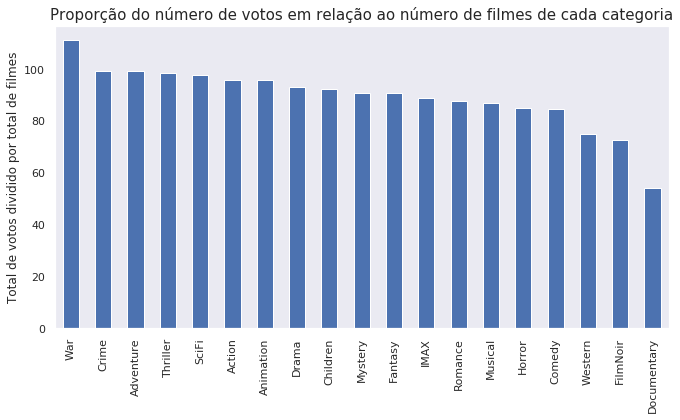

In [0]:
# obtendo a visualização com o gráfico de colunas
fig, ax = plt.subplots(figsize = (10,6))

votos_por_filme_por_genero.sort_values(ascending=False).plot(ax = ax, kind = 'bar', grid=False)
ax.set_title('Proporção do número de votos em relação ao número de filmes de cada categoria', fontsize=15)
ax.set_ylabel('Total de votos dividido por total de filmes', fontsize=12)

plt.tight_layout()

## Olhando as 3 últimas visualizações o que você conclui sobre os gêneros `Action` e `War`?




### Solução

Dentre os 450 filmes do DataFrame, 164 são do gênero `Action`. Além disso, esse gênero de filme é o que mais tem avaliações, tendo um total de mais de 14000 votos. Estando no top 5 de gêneros com mais filmes, era esperado que o total de votos para `Action` fosse elevado.

Mas em média, filmes da categoria `War` são os que mais recebem avaliações. Filmes dessa categoria ocupam a quarta pior colocação em número de filmes, mas cada filme tem em média mais de 100 avaliações.

Nesse caso, podemos observar que filmes do gênero `Action` tem muitas avaliações simplesmente porque há muitos filmes desse gênero. O gênero `War` por sua vez, possui poucos filmes mas esses poucos filmes recebem muitos votos. 


## Visualização das estatísticas - total de votos

### Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure` 

Dica:

- As vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn.
- A função `plt.boxplot` suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado.

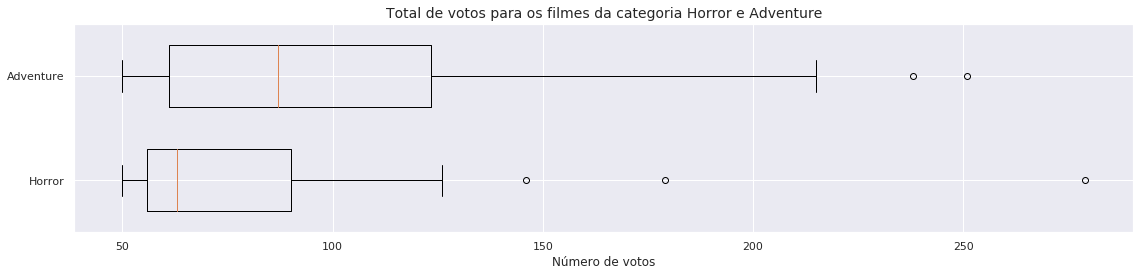

In [0]:
# separando os filmes do DataFrame em somente filmes do gênero horror
total_de_votos_horror = filmes['total_de_votos'][filmes['Horror'] == 1]

# separando os filmes do DataFrame em somente filmes do gênero adventure
total_de_votos_adventure = filmes['total_de_votos'][filmes['Adventure'] == 1]

# plotando o boxplot
fig, ax = plt.subplots(figsize=(16,4))

plt.boxplot([total_de_votos_horror,total_de_votos_adventure], labels = ['Horror','Adventure'], vert = False, widths = 0.6)
plt.xlabel('Número de votos', fontsize = 12)
plt.title('Total de votos para os filmes da categoria Horror e Adventure', fontsize=14)

fig.tight_layout();

### Mostre agora um boxplot para cada uma das categorias

Dica:
- Use generos.columns para acessar todos os gêneros.
- Já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros.
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels.

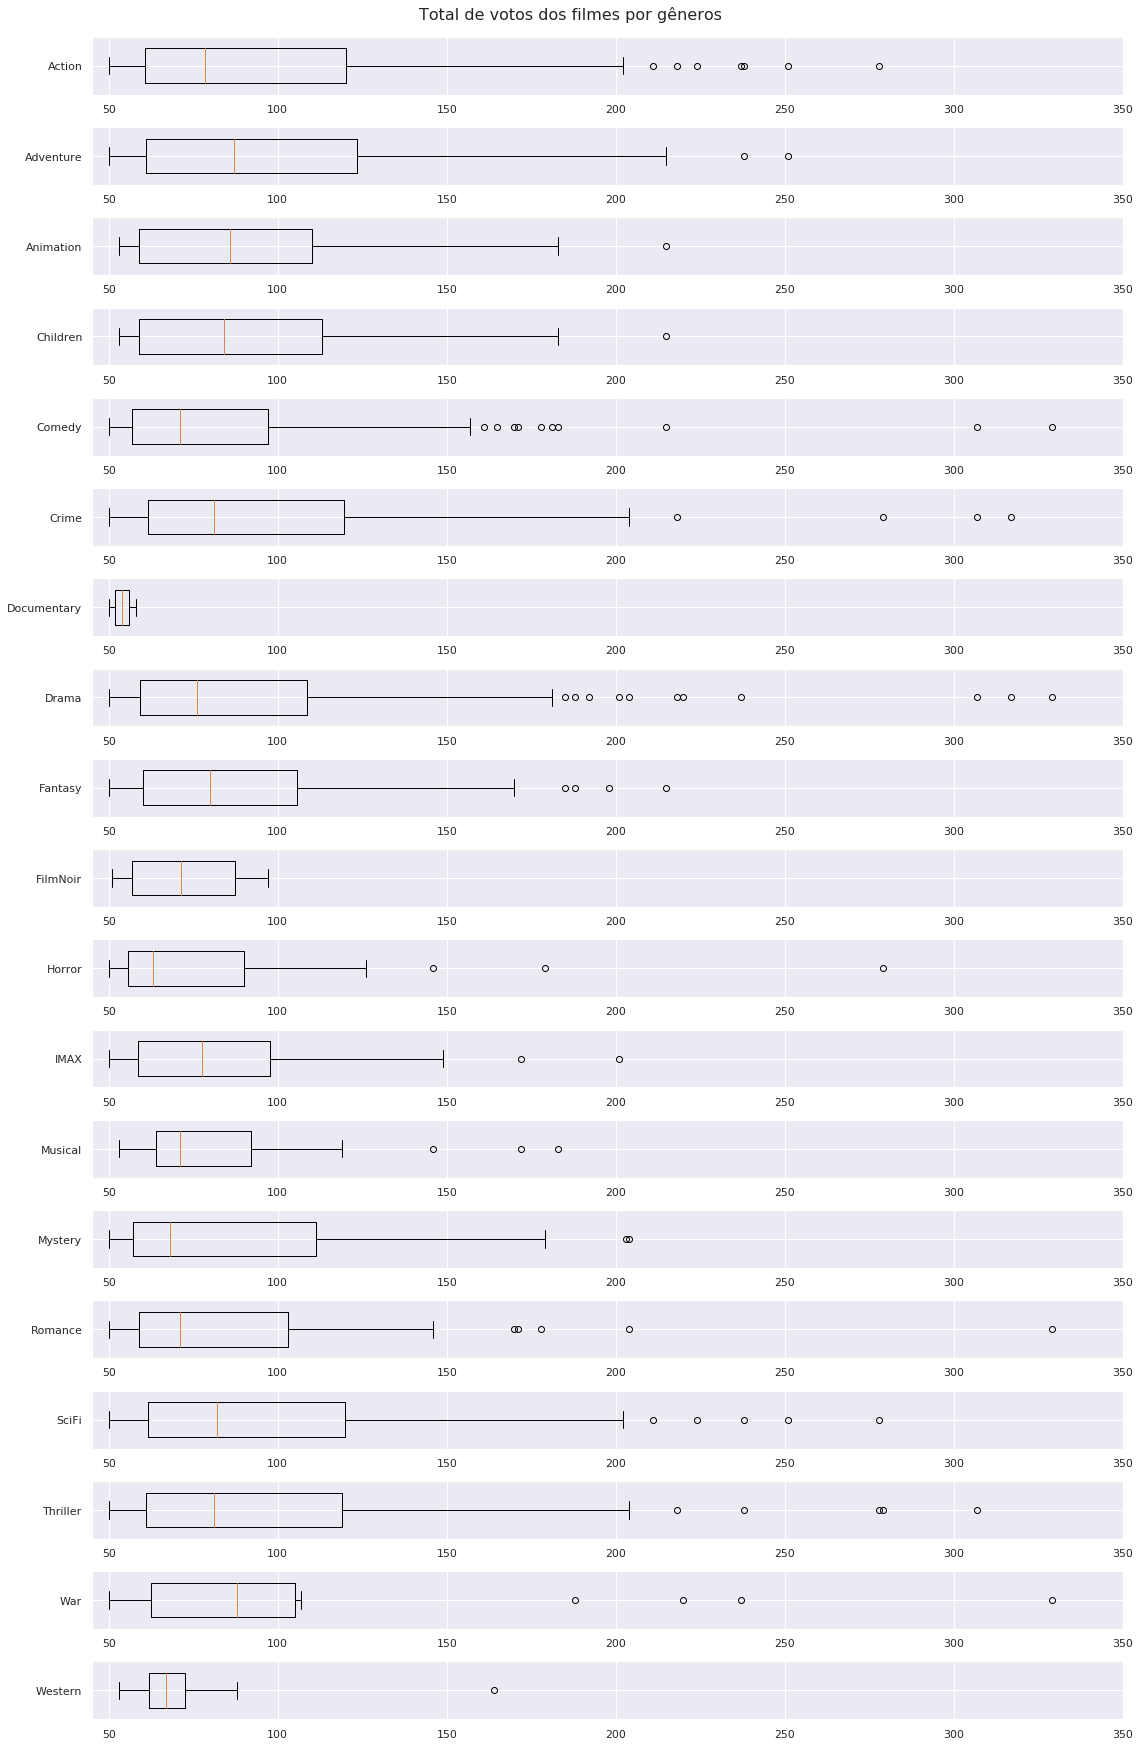

In [0]:
# obtendo o nome de cada gênero de filmes
colunas = generos.columns

# plotando um bloxplot para cada gênero
fig, ax = plt.subplots(nrows = 19, ncols = 1, figsize = (16,24))
fig.suptitle('Total de votos dos filmes por gêneros', fontsize=16, y=1.01)
idx = 0
for col in colunas:
  idx += 1
  plt.subplot(19, 1, idx)
  plt.boxplot(filmes['total_de_votos'][filmes[col] == 1], labels = [col], vert = False, widths = 0.6)
  plt.xlim((45, 350))

plt.tight_layout();

### Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

#### Solução:

No caso eu sugiro que seja criado um filme do gênero `Adventure`. Pelo boxplot podemos visualizar que esse gênero possui um total de votos superior ao gênero `Horror`. 

Mesmo que o gênero `Horror` possua um filme com mais de 250 votos, 75% dos filmes desse gênero possuem menos de 100 votos. Enquanto 75% dos filmes do gênero `Adventure` possuem mais de 100 votos.

Nesse caso, filmes do gênero `Adventure` parecem ter um engajamento maior do público do que filmes do gênero `Horror`, o que aumentaria as chances de um faturamento maior.

## Teste para as estatísticas - total de votos

### Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- Visualize a distribuição de ambas através de histogramas.
- Se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas.
- Aplique um teste adequado de comparação das distribuições.
- Explique o resultado encontrado.
- Utilize p=0.05.

Para determinarmos que o total de votos para filmes do gênero `Adventure` é realmente superior ao total de votos para filmes do gênero `Horror` devemos aplicar um teste estatístico de comparação de médias. Os testes mais comuns são o `z-test` e o `t-test`, que se diferenciam em relação a presença ou não do desvio padrão populacional. 

Porém, ambos os testes têm como pressuposto a normalidade da distruibuição da variável que está sendo analisada. Sendo assim, antes de realizar qualquer teste devemos observar se o total de votos para os gêneros `Adventure` e `Horror` são normalmente distribuidos.

Para isso, primeiro faz-se uma análise visual do histograma das variáveis para observar se sua distribuição tem o formato característico de uma normal. Para confirmar, faz-se um teste de hipóteses para normalidade da distribuição.

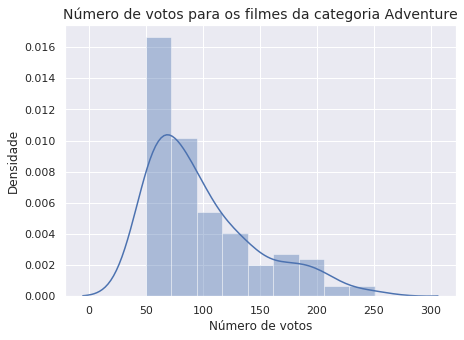

In [0]:
# solucao histograma de aventura
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['total_de_votos'][filmes['Adventure'] == 1], ax=ax)
ax.set(xlabel = 'Número de votos', ylabel = 'Densidade')
ax.set_title('Número de votos para os filmes da categoria Adventure', fontsize=14)
plt.show();

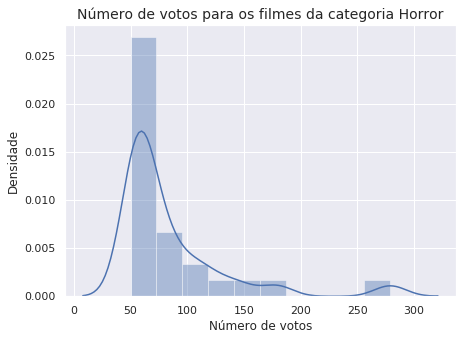

In [0]:
# solucao histograma de horror
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['total_de_votos'][filmes['Horror'] == 1], ax=ax)
ax.set(xlabel = 'Número de votos', ylabel = 'Densidade')
ax.set_title('Número de votos para os filmes da categoria Horror', fontsize=14)
plt.show();

De acordo com os histogramas do número de votos para os filmes dos gêneros `Adventure` e `Horror`, podemos observar que nenhuma das variáveis possui uma distribuição semelhante a distribuição normal. 

Para confirmar a não-normalidade da distribuição das variáveis, devemos seguir com o teste estatístico de normalidade. No `normaltest` que será utilizado, temos como hipótese nula a normalidade da distribuição, enquanto a hipótese alternativa refuta essa normalidade.

In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_, p = normaltest(filmes['total_de_votos'][filmes['Adventure'] == 1])
print('P-valor do teste de normalidade para o total de votos dos filmes da categoria Adventure: {:.6f}'.format(p))

P-valor do teste de normalidade para o total de votos dos filmes da categoria Adventure: 0.000006


In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p = normaltest(filmes['total_de_votos'][filmes['Horror'] == 1])
print('P-valor do teste de normalidade para o total de votos dos filmes da categoria Horror: {:.7f}'.format(p))

P-valor do teste de normalidade para o total de votos dos filmes da categoria Horror: 0.0000001


Dado que ambos os testes apresentaram um `p-valor` inferior a 0.05, rejeitamos a hipótese nula em ambos os casos. Logo, com um nível de confiança de 95%, podemos afirmar que o total de votos para os filmes dos gêneros `Adventure` e `Horror` não seguem uma distribuição normal.

Nesse caso, não podemos utilizar o `z-test` ou o `t-test` para comparação de média. A alternativa é utilizar o teste `ranksums`, baseado no teste não-paramétrico Wilcoxon. A razão de sua utilização é que não há o pressuposto de normalidade das variáveis.

In [0]:
# solução com o teste desejado - ranksums
from scipy.stats import ranksums
stat, p = ranksums(filmes['total_de_votos'][filmes['Adventure'] == 1],filmes['total_de_votos'][filmes['Horror'] == 1])
print('Estatística do teste: {:.3f}'.format(stat))
print('p-valor do teste: {:.3f}'.format(p))

Estatística do teste: 1.979
p-valor do teste: 0.048


#### Solução (explique sua conclusão):

Pelos resultados obtidos podemos inferir com um nível de confiança de 95% que o total de votos para os filmes dos gêneros `Adventure` e `Horror` são estatísticamente diferentes. Essa conclusão é baseada na rejeição da hipótese nula do teste  `ranksums`, dado o `p-valor` menor que 0.05.

Além disso, temos que o valor da estatística do teste é positivo. Ao montar o teste, comparamos o total de votos dos filmes do gênero `Adventure` com o total de votos dos filmes do gênero `Horror`, logo, o valor positivo da estatística do teste indica que a média do primeiro valor é superior a média do segundo.

Nesse caso, o teste estatística confirmou a hipótese criada na análise visual. O total de votos para os filmes de gênero `Adventure` é estatisticamente superior ao total de votos para os filmes do gênero `Horror`.

## Visualização das estatísticas - nota média

### Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

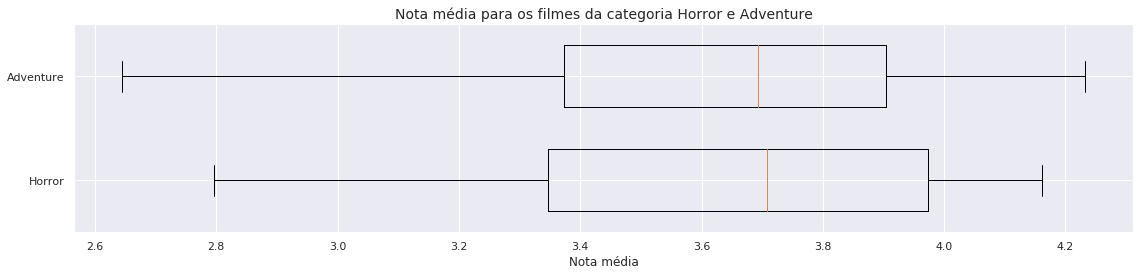

In [0]:
# separando os filmes do DataFrame em somente filmes do gênero horror
nota_media_horror = filmes['nota_media'][filmes['Horror'] == 1]

# separando os filmes do DataFrame em somente filmes do gênero adventure
nota_media_adventure = filmes['nota_media'][filmes['Adventure'] == 1]

# plotando o boxplot
fig, ax = plt.subplots(figsize=(16,4))

plt.boxplot([nota_media_horror,nota_media_adventure], labels = ['Horror','Adventure'], vert = False, widths = 0.6)
plt.xlabel('Nota média', fontsize = 12)
plt.title('Nota média para os filmes da categoria Horror e Adventure', fontsize=14)

fig.tight_layout();

### Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

#### Solução:

Baseado no boxplot para as notas médias, eu recomendaria a criação de um filme do gênero `Horror`. Podemos observar que a mediana da nota média dos filmes desse gênero é ligeiramente superior a mediana da nota média dos filmes do gênero `Adventure`. Logo, filmes do gênero `Horror` costumam ter notas maiores.

## Teste para as estatísticas - nota média

### Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- Visualize a distribuição de ambas através de histogramas.
- Se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas.
- Aplique um teste adequado de comparação das distribuições.
- Explique o resultado encontrado.
- Utilize p=0.05.

Assim como feito anteriormente, iremos visualizar o histograma da nota média dos filmes do gênero `Adventure` e `Horror` para observar se há ou não a similaridade com uma distribuição normal.

Para confirmar ou não a hipótese de normalidade, será feito um teste de normalidade. Caso a distribuição das variáveis seja normal, será utilizado o teste `z-test` e o `t-test` para comparação de médias. Caso contrário, utilizaremos o teste `ranksums`.

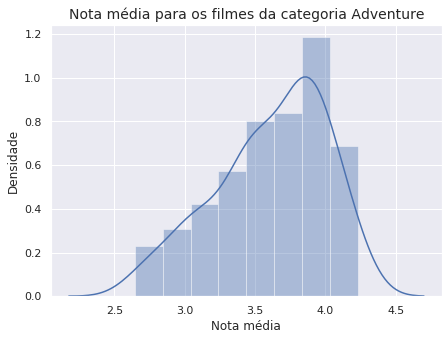

In [0]:
# solucao histograma de aventura
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['nota_media'][filmes['Adventure'] == 1], ax=ax)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média para os filmes da categoria Adventure', fontsize=14)
plt.show();

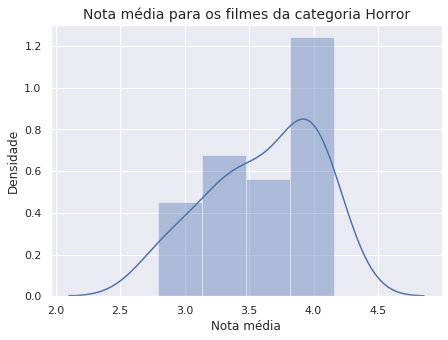

In [0]:
# solucao histograma de aventura
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(filmes['nota_media'][filmes['Horror'] == 1], ax=ax)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Nota média para os filmes da categoria Horror', fontsize=14)
plt.show();

Pelo histograma das notas médias para os filmes dos gêneros `Adventure` e `Horror`, temos que ambos se assemelham a uma normal no quesito forma, dado que a distribuição normal tem o formato característico de um 'sino'. Porém, a distribuição das variáveis não é simétrica, tendo uma maior concentração de valores na direita.

Nesse caso, o teste estatístico de normalidade se faz ainda mais importante, dado que com a análise visual não é possível concluir muita coisa.

In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_, p = normaltest(filmes['nota_media'][filmes['Adventure'] == 1])
print('P-valor do teste de normalidade para a média das notas dos filmes da categoria Adventure: {:.6f}'.format(p))

P-valor do teste de normalidade para a média das notas dos filmes da categoria Adventure: 0.012836


In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p = normaltest(filmes['nota_media'][filmes['Horror'] == 1])
print('P-valor do teste de normalidade para a média das notas dos filmes da categoria Horror: {:.6f}'.format(p))

P-valor do teste de normalidade para a média das notas dos filmes da categoria Horror: 0.211863


Para a nota média dos filmes do gênero `Adventure`, temos um `p-valor` inferior a 0.05, logo, rejeitamos a hipótese nula de normalidade da distribuição.

Para a nota média dos filmes do gênero `Horror`, temos um `p-valor` superior a 0.05, o que nos leva a não rejeitar a hipótese nula de normalidade. Nesse caso, teriamos que a nota média dos filmes do gênero `Horror` seguem uma distribuição normal.

Porém, observando o número de filmes do gênero `Horror`, temos que:

In [0]:
print('Quantidade de filmes do gênero Horror: {}'.format(filmes['nota_media'][filmes['Horror'] == 1].shape[0]))

Quantidade de filmes do gênero Horror: 26


Temos somente 26 filmes do gênero Horror no DataFrame, esse valor é muito baixo para concluirmos que há um distribuição normal para essa variável. Geralmente, começa-se a considerar a normalidade de uma distribuição em amostras com mais de 30 observações.

Logo, apesar do resultado do teste, será considerado que ambas as variáveis não seguem uma distribuição normal. Nesse caso, para compararmos a média das variáveis, utilizaremos o teste `ranksums`.

In [0]:
# solução com o teste desejado - ranksums
from scipy.stats import ranksums
stat, p = ranksums(filmes['nota_media'][filmes['Adventure'] == 1],filmes['nota_media'][filmes['Horror'] == 1])
print('Estatística do teste: {:.3f}'.format(stat))
print('p-valor do teste: {:.3f}'.format(p))

Estatística do teste: -0.213
p-valor do teste: 0.831


Pelo fato da estatística do teste ser negativa, temos que a média das notas médias dos filmes do gênero `Adventure` são menores que as do gênero `Horror`. 

Porém, o `p-valor` do teste é superior a 0.05, o que nos faz não rejeitar a hipótese de que ambas as variáveis seguem a mesma distribuição. Logo, podemos inferir que a média das notas médias para os filmes dos gêneros `Adventure` e `Horror` são estatísticamente iguais.

### Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.

#### Solução:

Dado o resultado obtido no teste de comparação de médias, a recomendação mudaria. Nesse caso, tanto um filme do gênero `Horror` quanto um filme do gênero `Adventure` possuem a mesma possibilidade de terem notas altas, dado que a média das notas desses filmes não são diferentes.

### Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

#### Solução:

Considerando tanto notas altas quanto o número de pessoas assistindo, eu recomendo a criação de um filme do gênero `Adventure`. 

Em relação a nota, vimos que a média das notas de filmes de ambos os gêneros não possuem diferença estatística, porém, em relação ao número de votos temos que filmes do gênero `Adventure` recebem mais votos.

No caso, não temos os dados sobre o número de pessoas que assistiram os filmes, mas o número de votos é uma boa aproximação (*proxy*) desse valor. Se uma pessoa avalia um filme, espera-se que no mínimo ela tenha assistido o filme. Logo, se filmes do gênero `Adventure` possui mais votos, significa que mais pessoas assistiram. Então o mais indicado é criar um filme desse gênero.

Um teste que poderia ser feito para tornar essa recomendação mais robusta, é ver se pessoas que assistem filmes do gênero `Horror` estão mais propensar a dar uma avaliação do filme. É possível que muitas pessoas assistam filmes desse gênero, mais até que o número de pessoas que assistem filmes do gênero `Adventure`, mas não avaliam. Tendo dados para realizar esse testo, o resultado nos ajudaria na tomada de decisão do gênero do filme a ser feito.

## Quais são os top 5 filmes dos 2 generos mais assistidas?

- Utilize os 2 generos mais votados em `votos_por_genero`.
- Utilize a `nota_media` para definir o top 5 filmes.
- O resultado são 5, não 10 filmes.

In [0]:
# descobrindo 2 generos mais assistidos
numero_de_generos = 2
generos_mais_assistidos = votos_por_genero_por_filme.sum().sort_values(ascending=False)[0:numero_de_generos].index

print('Primeiro gênero mais assistido:\t {}'.format(generos_mais_assistidos[0]))
print('Segundo gênero mais assistido:\t {}'.format(generos_mais_assistidos[1]))

Primeiro gênero mais assistido:	 Action
Segundo gênero mais assistido:	 Drama


In [0]:
# top 5 filmes da primeira categoria 
top = 5
filmes[['titulo','nota_media',generos_mais_assistidos[0]]][(filmes[generos_mais_assistidos[0]] == 1)].sort_values('nota_media',ascending = False)[0:top]

,titulo,nota_media,Action
filmeId,,,
2959,Fight Club,4.272936,1
58559,"Dark Knight, The",4.238255,1
1197,"Princess Bride, The",4.232394,1
260,Star Wars: Episode IV - A New Hope,4.231076,1
1208,Apocalypse Now,4.219626,1


In [0]:
# top 5 filmes da segunda categoria
top = 5
filmes[['titulo','nota_media',generos_mais_assistidos[1]]][(filmes[generos_mais_assistidos[1]] == 1)].sort_values('nota_media',ascending = False)[0:top]

,titulo,nota_media,Drama
filmeId,,,
318,"Shawshank Redemption, The",4.429022,1
858,"Godfather, The",4.289062,1
2959,Fight Club,4.272936,1
1276,Cool Hand Luke,4.271930,1
1221,"Godfather: Part II, The",4.259690,1


## Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas.

In [0]:
# calculando correlações
corr_nota = filmes.drop(labels = ['ano_de_lancamento','total_de_votos'], axis = 1).corr().round(2)

# criando lista com o nome dos gêneros
corr_top_nota = [i for i in corr_nota['nota_media'].sort_values(ascending = False)[1:3].index]
corr_down_nota = [i for i in corr_nota['nota_media'].sort_values(ascending = True)[0:2].index]

print('Primeiro gênero com maior valor de correlação:\t {} ({})'.format(corr_top_nota[0], corr_nota['nota_media'].sort_values(ascending = False)[1:3].values[0]))
print('Segundo gênero com maior valor de correlação:\t {} ({})'.format(corr_top_nota[1], corr_nota['nota_media'].sort_values(ascending = False)[1:3].values[1]))

Primeiro gênero com maior valor de correlação:	 Drama (0.28)
Segundo gênero com maior valor de correlação:	 Crime (0.19)


In [0]:
print('Primeiro gênero com menor valor de correlação:\t {} ({})'.format(corr_down_nota[0], corr_nota['nota_media'].sort_values(ascending = True)[0:2].values[0]))
print('Segundo gênero com menor valor de correlação:\t {} ({})'.format(corr_down_nota[1], corr_nota['nota_media'].sort_values(ascending = True)[0:2].values[1]))

Primeiro gênero com menor valor de correlação:	 Comedy (-0.26)
Segundo gênero com menor valor de correlação:	 Action (-0.15)


## Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [0]:
# calculando correlações
corr_total_votos = filmes.drop(labels = ['ano_de_lancamento','nota_media'], axis = 1).corr().round(2)

# criando lista com o nome dos gêneros
corr_top_total_votos = [i for i in corr_total_votos['total_de_votos'].sort_values(ascending = False)[1:3].index]
corr_down_total_votos = [i for i in corr_total_votos['total_de_votos'].sort_values(ascending = True)[0:2].index]

print('Primeiro gênero com maior valor de correlação:\t {} ({})'.format(corr_top_total_votos[0], corr_total_votos['total_de_votos'].sort_values(ascending = False)[1:3].values[0]))
print('Segundo gênero com maior valor de correlação:\t {} ({})'.format(corr_top_total_votos[1], corr_total_votos['total_de_votos'].sort_values(ascending = False)[1:3].values[1]))

Primeiro gênero com maior valor de correlação:	 Adventure (0.1)
Segundo gênero com maior valor de correlação:	 War (0.09)


In [0]:
print('Primeiro gênero com menor valor de correlação:\t {} ({})'.format(corr_down_total_votos[0], corr_total_votos['total_de_votos'].sort_values(ascending = True)[0:2].values[0]))
print('Segundo gênero com menor valor de correlação:\t {} ({})'.format(corr_down_total_votos[1], corr_total_votos['total_de_votos'].sort_values(ascending = True)[0:2].values[1]))

Primeiro gênero com menor valor de correlação:	 Comedy (-0.13)
Segundo gênero com menor valor de correlação:	 Western (-0.06)


## Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`.

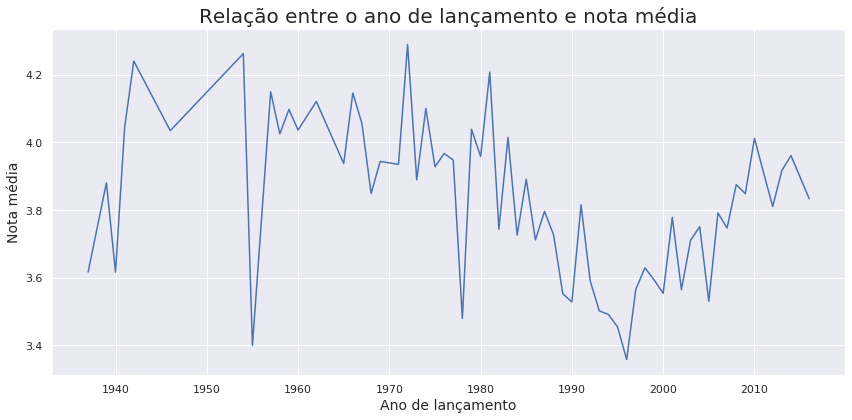

In [0]:
# agrupando para ano de lançamento
group_ano_de_lancamento = filmes.groupby('ano_de_lancamento')

# calculando nota média para os filmes
nota_media_filmes = group_ano_de_lancamento['nota_media'].mean()

# criando DataFrame
ano_nota = pd.DataFrame(nota_media_filmes)

# plotando o gráfico
fig, ax = plt.subplots(figsize = (12,6))

sns.lineplot(data = ano_nota, ax = ax, legend = False)
ax.set_title("Relação entre o ano de lançamento e nota média", fontsize = 20)
ax.set_ylabel("Nota média", fontsize = 14)
ax.set_xlabel("Ano de lançamento", fontsize=14)

plt.tight_layout()

De acordo com o gráfico do ano de lançamento do filme e a nota média, podemos observar que entre a década de 80 e a metade dos anos 90 houve uma queda na nota média dos filmes lançados nesse período. Porém, desde a metade da década de 90 a nota média dos filmes lançados no período voltou a aumentar.

## Interprete a correlação entre `ano_de_lancamento` e a `nota_media`

- Calcule a correlação numericamente (use o `corr` do pandas).
- Correlação não implica causalidade, qual \"problema\" na coleta dos dados pode gerar esse tipo de correlação?

In [0]:
# calculando a correlação
corr = filmes[['ano_de_lancamento','nota_media']].corr().round(2)
corr

,ano_de_lancamento,nota_media
ano_de_lancamento,1.00,-0.16
nota_media,-0.16,1.00


### Solução (explicação)

A correlação entre o ano de lançamento do filme e sua nota média é negativa. Quanto mais novo o filme é, logo, maior é o seu ano de lançamento, mais ele tende a ter uma nota média menor do que os filmes lançados anteriormente. Nós podemos ver essa relação no `lineplot` feito anteriormente, com uma queda na nota média dos filmes entre a década de 80 e metade da década de 90.

Duas explicações são possíveis para explicar essa relação. Primeiramente, os filmes antigos que estão no *dataset* do MovieLens são filmes clássicos. Se observarmos os cinco filmes mais antigos do DataFrame vemos que são Branca de Neve e os Sete Anões, Mágico de Oz, Pinóquio, Fantasia e Cidadão Kane, ou seja, são filmes clássicos que são muito famosos, logo, tendem a ter uma nota média mais elevada.

A segunda explicação é que os filmes antigos que foram ruins e teriam notas ruins, simplesmente foram esquecidos. Não quer dizer que atualmente os filmes lançados são ruins em comparação com os antigos, quer dizer que hoje temos informação sobre todos os filmes lançados em um ano, bons ou ruins, e a possibilidade de opinar sobre eles é muito maior.

In [0]:
# descobrindo os cinco filmes mais antigos
top5_filmes_antigos = [ano for ano in filmes['ano_de_lancamento'].sort_values()[0:5].index]

# cinco filmes mais antigos do DataFrame
filmes.loc[top5_filmes_antigos]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
594,Snow White and the Seven Dwarfs,1937.0,3.616883,77.0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
919,"Wizard of Oz, The",1939.0,3.880435,92.0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
596,Pinocchio,1940.0,3.450000,60.0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1282,Fantasia,1940.0,3.783019,53.0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
923,Citizen Kane,1941.0,4.043478,69.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


## Análise de um pairplot


### Filmes em geral

- Crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`.
- Faça o pairplot usando seaborn.
- Coloque uma regressão linear para cada pequeno plot dentro dele.

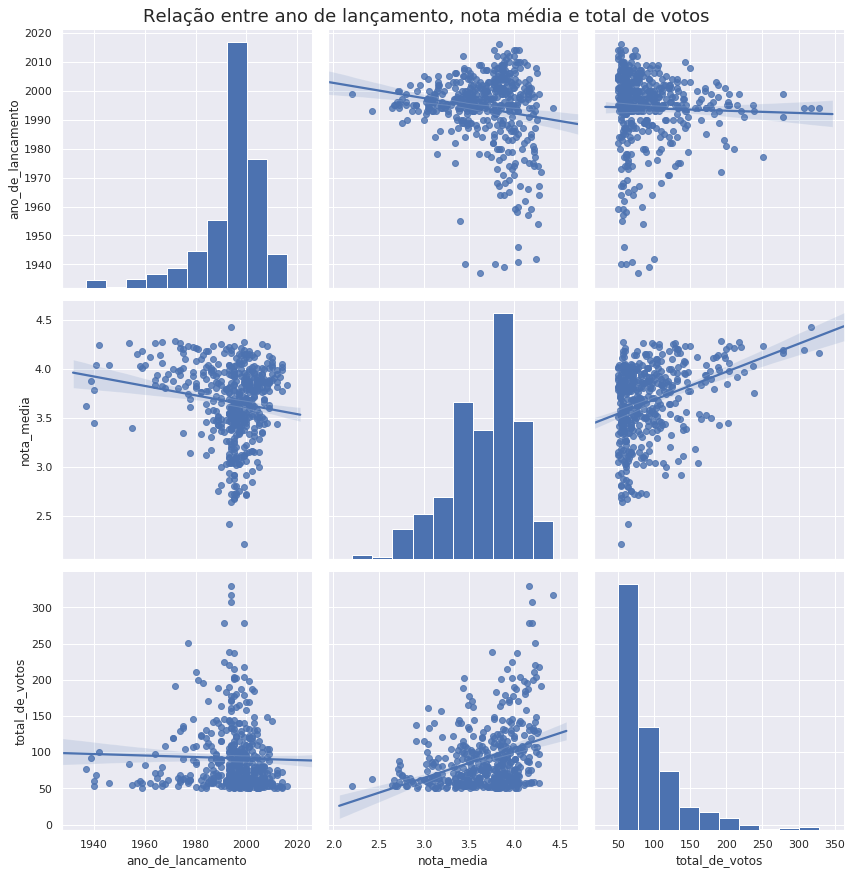

In [0]:
# criando a variável infos
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]

# plotando o pairplot

ax = sns.pairplot(infos, kind = 'reg', height = 4)
ax.fig.suptitle('Relação entre ano de lançamento, nota média e total de votos', fontsize = 18, y=1.01)

plt.tight_layout();

### Filmes de `Animation`

- Use o dataframe `filmes`.
- Em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros.
- Use uma palete como `husl`.
- Use marcadores distintos para cada um dos dois grupos.
- Faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele.
- Tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`.

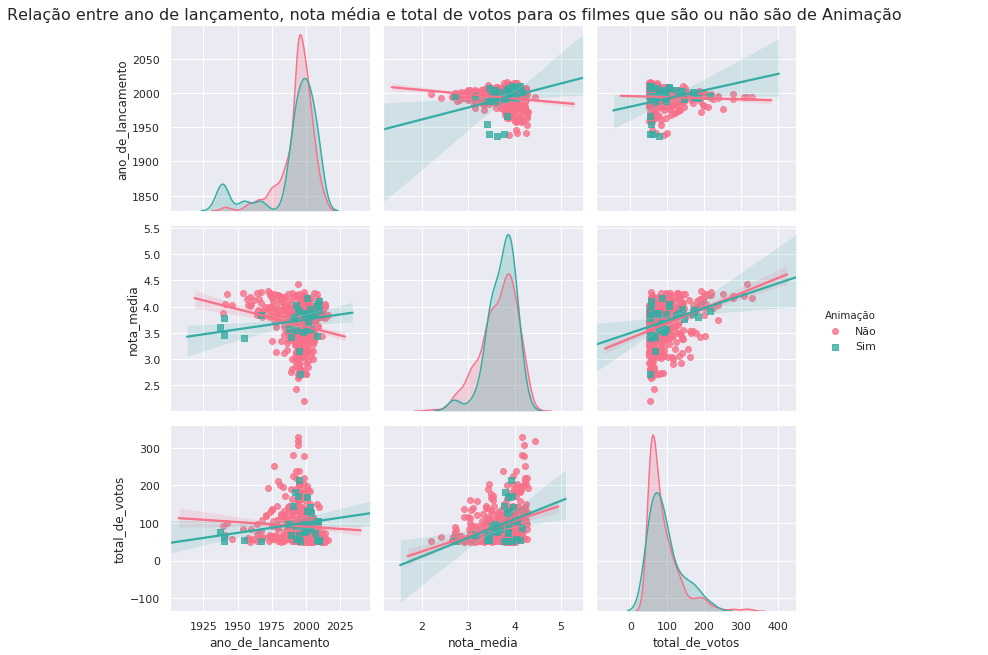

In [0]:
# plotando o pairplot

ax = sns.pairplot(filmes, y_vars=['ano_de_lancamento','nota_media','total_de_votos'],
                  x_vars=['ano_de_lancamento','nota_media','total_de_votos'],
                  kind = 'reg', height = 3,
                  hue='Animation', markers=["o", "s"], palette = 'husl')

ax.fig.suptitle('Relação entre ano de lançamento, nota média e total de votos para os filmes que são ou não são de Animação', fontsize = 16, y=1.01)
ax._legend.set_title('Animação')
ax._legend.set_bbox_to_anchor((1.25, 0.5))
new_labels = ['Não', 'Sim']
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)

plt.tight_layout();

### Análise da regressão em relação ao ano de lançamento

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

#### Solução:

De acordo com o `pairplot` para todos os filmes podemos observar que:

- A relação entre o ano de lançamento e a nota média é negativa, como já visto anteriormente.
- Não parece haver uma relação linear ente o total de votos e ano de lançamento do filme.
- Há uma relação positiva entre o total de votos e a nota média, ou seja, quanto maior a quantidade de votos, maior é a tendência do filme ter uma nota média maior.
- Assim como visto anteriormente, o total de votos possui uma distribuição assimétrica concentrada à esquerda, ou seja, a maioria dos filmes possui entre 50 à 100 votos.
- A nota média e o ano de lançamento possui uma concentração de valores à direita, ou seja, a maioria dos filmes tende a ter uma nota entre 3,5 e 4,0 e a maioria dos filmes presente no DataFrame são mais novos.

Pelo `pairplot` dividindo os filmes como sendo de animação ou não, podemos observar que o fato de um filme ser de animação traz algumas diferenças na relação entre o ano de lançamento com a nota média e total de votos, em relação aos filmes em geral.

- Filmes de animação possuem uma relação positiva entre o ano de lançamento e a nota média, ou seja, quanto mais novo o filme é, maior é a tendência de sua nota média ser alta.
- Para os filmes em geral não parecia haver uma relação entre o ano de lançamento e o total de votos, mas para filmes de animação essa relação é positiva, quanto mais novo o filme é, maior é a tendência dele receber mais votos.

Uma explicação possível para essa diferença é que filmes de animação mais novos são melhores por causa do avanço computacional. Filmes mais antigos eram feitos com *stop-motion*, onde bonecos eram fotografados milhares de vezes em diferentes posições para criar uma história. Esse processo mais lento inviabilizava a criação de histórias mais complexas e interessantes para o público, logo são filmes com uma nota mais baixa. Atualmente, filmes de animação possuem histórias mais complexas, com mais personagens, maior duração, porque é mais fácil animar personagens pelo computador. Logo, filmes de animação mais novos tendem a ser melhores e ter uma nota média maior.

Essa característica parece ser particular de filmes do gênero `Animation`, pois ao observar a relação entre o ano de lançamento com a nota média e com o total de votos para filmes dos gêneros `Action`, `Comedy` e `Romance`, a relação é a mesma para os filmes analisados conjuntamente.

- Relação negativa entre o ano de lançamento e a nota média.
- Sem relação linear entre o ano de lançamento e total de votos.

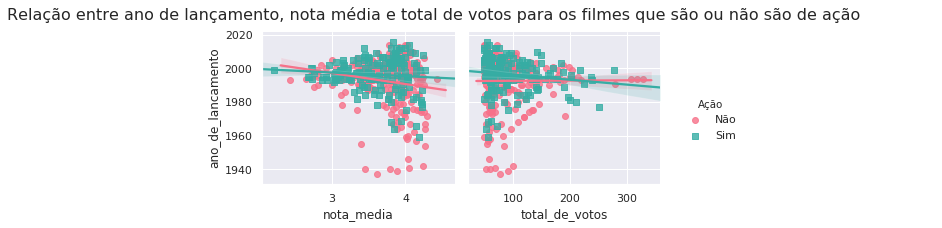

In [0]:
# pairplot para os filmes do gênero action
ax = sns.pairplot(filmes, y_vars=['ano_de_lancamento'],
                  x_vars=['nota_media','total_de_votos'],
                  kind = 'reg', height = 3,
                  hue='Action', markers=["o", "s"], palette = 'husl')

ax.fig.suptitle('Relação entre ano de lançamento, nota média e total de votos para os filmes que são ou não são de ação', fontsize = 16, y=1.05)
ax._legend.set_title('Ação')
ax._legend.set_bbox_to_anchor((1.56, 0.5))
new_labels = ['Não', 'Sim']
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)

plt.tight_layout();

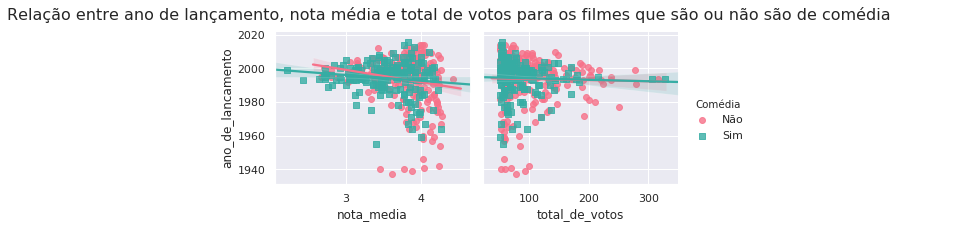

In [0]:
# pairplot para os filmes do gênero comedy
ax = sns.pairplot(filmes, y_vars=['ano_de_lancamento'],
                  x_vars=['nota_media','total_de_votos'],
                  kind = 'reg', height = 3,
                  hue='Comedy', markers=["o", "s"], palette = 'husl')

ax.fig.suptitle('Relação entre ano de lançamento, nota média e total de votos para os filmes que são ou não são de comédia', fontsize = 16, y=1.05)
ax._legend.set_title('Comédia')
ax._legend.set_bbox_to_anchor((1.56, 0.5))
new_labels = ['Não', 'Sim']
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)

plt.tight_layout();

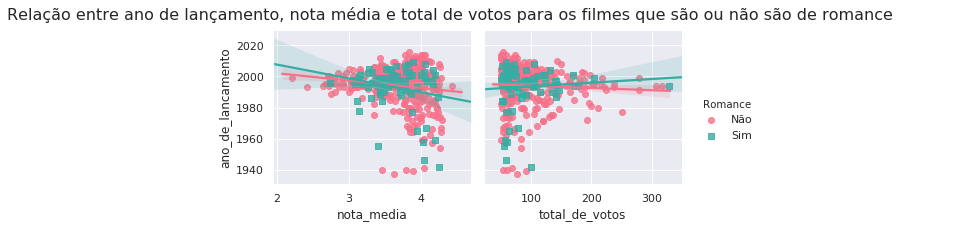

In [0]:
# pairplot para os filmes do gênero romance
ax = sns.pairplot(filmes, y_vars=['ano_de_lancamento'],
                  x_vars=['nota_media','total_de_votos'],
                  kind = 'reg', height = 3,
                  hue='Romance', markers=["o", "s"], palette = 'husl')

ax.fig.suptitle('Relação entre ano de lançamento, nota média e total de votos para os filmes que são ou não são de romance', fontsize = 16, y=1.05)
ax._legend.set_title('Romance')
ax._legend.set_bbox_to_anchor((1.56, 0.5))
new_labels = ['Não', 'Sim']
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)

plt.tight_layout();

## Explore

- Compartilhe conosco 2 visualizações extras que julgar interessante.
- Explique o que encontrou.
- Use quantas células (texto ou código) julgar necessário.

Nessa exploração adicional procurou-se respostas para duas perguntas:

- Dentre os piores filmes, quais são os gêneros mais comuns?
- Dentre os melhores filmes, quais são os gêneros mais comuns?

Para classificar os piores foi utilizado a nota média do percentil 5, ou seja, 5% das notas médias são menores que esse valor e 95% das notas são maiores que esse valor. Nesse caso, todo filme que teve nota igual ou menor que a nota do percentil 5 foi considerado como um filme ruim.

Para classificar os melhores foi utilizado a nota média do percentil 95, ou seja, 95% das notas médias são menores que esse valor e 5% das notas são maiores que esse valor. Todo filme com nota maior ou igual a esse valor foi considerado como um filme bom.

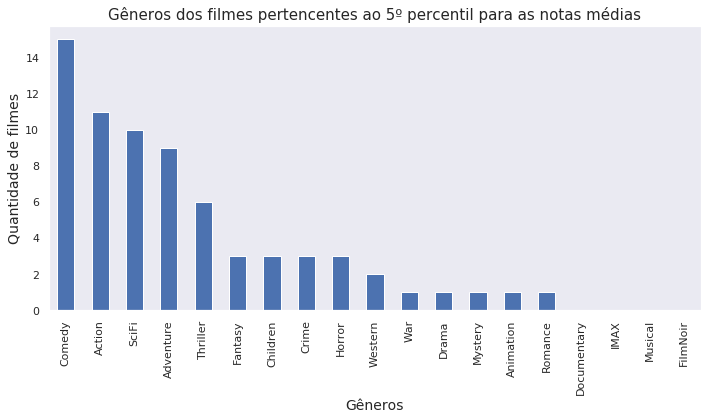

In [0]:
# calculando percentil 005 das notas
percentil_005 = filmes['nota_media'].quantile(0.05)

# calculando percentil 095 das notas
percentil_095 = filmes['nota_media'].quantile(0.95)

# criação do DataFrame dos filmes com notas abaixo do percentil 005
filmes_percentil_005 = filmes[filmes['nota_media'] <= percentil_005]

# criação do DataFrame dos filmes com notas acima do percentil 095
filmes_percentil_095 = filmes[filmes['nota_media'] >= percentil_095]

# gráfico de barras para os gêneros dos filmes com nota média abaixo do percentil 005
index_filmes_percentil_005 = [item for item in filmes_percentil_005.index]

fig, ax = plt.subplots(figsize = (10,6))

generos.loc[index_filmes_percentil_005].sum().sort_values(ascending=False).plot(ax = ax, kind = 'bar', grid=False)
ax.set_title('Gêneros dos filmes pertencentes ao 5º percentil para as notas médias', fontsize=15)
ax.set_xlabel('Gêneros', fontsize=14)
ax.set_ylabel('Quantidade de filmes', fontsize=14)

plt.tight_layout();

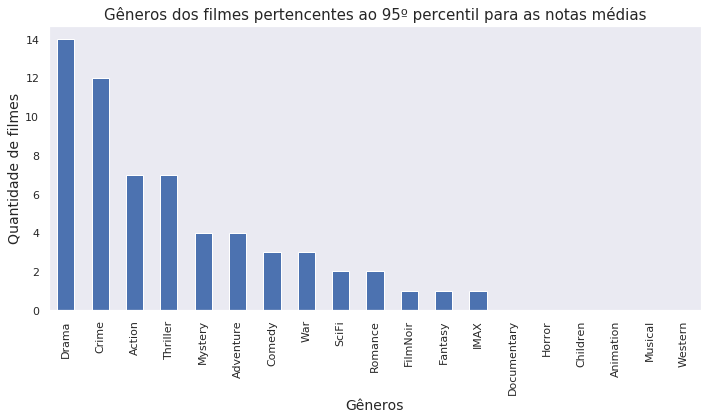

In [0]:
# gráfico de barras para os gêneros dos filmes com nota média acima do percentil 095
index_filmes_percentil_095 = [item for item in filmes_percentil_095.index]

fig, ax = plt.subplots(figsize = (10,6))

generos.loc[index_filmes_percentil_095].sum().sort_values(ascending=False).plot(ax = ax, kind = 'bar', grid=False)
ax.set_title('Gêneros dos filmes pertencentes ao 95º percentil para as notas médias', fontsize=15)
ax.set_xlabel('Gêneros', fontsize=14)
ax.set_ylabel('Quantidade de filmes', fontsize=14)

plt.tight_layout();

Dentre os piores filmes, ou seja, aqueles que possuem a menor nota média, é mais comum vermos filmes de comédia, seguidos por filmes de ação. Se lembrarmos do gráfico de quantidade de filmes por gênero, temos que no DataFrame o maior número de filmes é considerado como comédia. No caso, algum deles são considerados como ruins.

No gráfico de quantidade de filmes por gênero tinhamos que o segundo gênero mais comum era drama, mas temos somente um filme ruim que é do gênero drama.

Se observamos o gráfico de filmes considerados bons, temos que drama é justamente o gênero mais comum. Logo, se você deseja fazer um filme de sucesso que tenha uma nota média mais elevada, faça um filme de drama.

---